# Tratamento de Dados

## Bibliotecas

In [235]:
# https://www.zapimoveis.com.br/venda/apartamentos/sp/?transacao=Venda&tipoUnidade=Residencial,Apartamento&tipo=Im%C3%B3vel%20usado&pagina=1&ordem=Data%20Atualiza%C3%A7%C3%A3o&onde=,S%C3%A3o%20Paulo,,,,,,STATE,BR%3ESao%20Paulo,,,

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [237]:
df = pd.read_csv('https://raw.githubusercontent.com/felipedidier/webscraping_calculadora_de_aluguel/main/df_zapimoveis.csv', delimiter ='|', encoding='utf-8-sig')

In [238]:
df.head()

,property_describe,price,area,room,bath,garage,address
0,Condomínio fechado com apartamentos de 2 dormi...,R$ 162.990,40 m²,2,1.0,1,"Rua Gaspar Vaz da Cunha, Caixa D Agua"
1,Lindos apartamentos na planta de 2 e 3 dormitó...,R$ 229.000,68 - 82 m²,2 - 3,NaN,1 - 2,"Rua Padre Fischer, Parque São Luís"
2,Condomínio fechado com apartamentos de 2 dormi...,R$ 163.990,40 m²,2,1.0,1,"Avenida Arnaldo Felipe Sbruzzi, Piracangagua"
3,Maravilhoso apartamento com varanda Gourmet sa...,R$ 949.000,89 m²,3,3.0,2,"Rua Tebas, Vila Mascote"
4,O apartamento está localizado no bairro Sacomã...,R$ 163.000,35 m²,2,1.0,1,"Rua Antônio Gomes Ferreira, Sacomã"


In [239]:
df.shape

(231, 7)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_describe  231 non-null    object 
 1   price              231 non-null    object 
 2   area               231 non-null    object 
 3   room               231 non-null    object 
 4   bath               227 non-null    float64
 5   garage             231 non-null    object 
 6   address            231 non-null    object 
dtypes: float64(1), object(6)
memory usage: 12.8+ KB


In [241]:
df['room'].value_counts()

2        151
3         60
4         15
2 - 3      4
1          1
Name: room, dtype: int64

In [242]:
df['bath'].value_counts()

2.0     95
1.0     90
4.0     22
3.0     14
5.0      5
33.0     1
Name: bath, dtype: int64

In [243]:
df['garage'].value_counts()

1        163
2         42
3         13
4          5
6          5
1 - 2      3
Name: garage, dtype: int64

In [244]:
df['area'].value_counts()

50 m²           25
53 m²           23
52 m²           19
86 m²           10
100 m²           9
54 m²            9
206 m²           9
49 m²            6
51 m²            5
180 m²           5
178 m²           5
266 m²           5
367 m²           5
83 m²            5
47 m²            5
64 m²            5
44 - 46 m²       5
42 - 83 m²       5
85 m²            5
77 m²            5
70 m²            5
90 m²            5
81 m²            4
82 m²            4
55 m²            4
145 m²           4
60 m²            4
59 m²            4
39 m²            3
35 m²            3
89 m²            3
40 m²            2
87 m²            1
56 m²            1
43 m²            1
104 m²           1
38 m²            1
151 m²           1
39 - 45 m²       1
127 m²           1
173 m²           1
190 m²           1
68 - 82 m²       1
38 - 39 m²       1
110 - 134 m²     1
50 - 51 m²       1
63 m²            1
67 - 122 m²      1
Name: area, dtype: int64

In [245]:
df['price'].value_counts()

R$ 300.000      14
Sob consulta    12
R$ 309.000      10
R$ 853.830      10
R$ 255.000      10
R$ 950.000       9
R$ 1.400.000     9
R$ 325.000       9
R$ 650.000       9
R$ 333.190       5
R$ 850.000       5
R$ 199.000       5
R$ 425.000       5
R$ 981.000       5
R$ 2.600.000     5
R$ 4.800.000     5
R$ 429.000       5
R$ 280.000       5
R$ 210.000       5
R$ 218.000       5
R$ 1.390.000     5
R$ 970.861       5
R$ 8.800.000     5
R$ 250.000       5
R$ 420.000       4
R$ 330.000       4
R$ 290.000       4
R$ 295.000       4
R$ 600.000       4
R$ 1.320.000     4
R$ 364.000       4
R$ 570.000       4
R$ 670.000       4
R$ 163.000       3
R$ 949.000       3
R$ 590.000       1
R$ 308.000       1
R$ 480.000       1
R$ 200.000       1
R$ 162.990       1
R$ 700.000       1
R$ 1.500.000     1
R$ 163.990       1
R$ 155.990       1
R$ 158.490       1
R$ 256.200       1
R$ 229.000       1
R$ 430.000       1
R$ 4.180.000     1
R$ 1.250.000     1
R$ 975.000       1
R$ 185.340       1
R$ 170.490  

In [246]:
df['address'].value_counts()

Rua Nicolau Tolentino de Almeida, Vila Dionísia       10
Rua Engenheira Amália Pérola Cassab, Parque Munhoz    10
Avenida dos Carinás, Moema                            10
Rua Sebastião Carneiro, Vila Monumento                 9
Rua Benedito Faber, Morumbi                            9
                                                      ..
Rua Olímpio Portugal, Móoca                            1
Rua Francisco José da Silva, Morumbi                   1
Rua Cancioneiro Popular, Chácara Santo Antônio         1
Avenida Professor Celestino Bourroul, Limão            1
Rua Albatroz, Praia Grande                             1
Name: address, Length: 62, dtype: int64

In [247]:
df['area'] = df['area'].str.replace(r"\-.*","").str.replace(r" m²","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [248]:
df['price'] = df['price'].str.replace('R$ ', '', regex = False).str.replace('.', '', regex = False).replace('Sob consulta', np.nan).astype(float)

In [249]:
df['room'] = df['room'].str.replace('2 - 3', '2').astype(float)

In [250]:
df['garage'] = df['garage'].str.replace('1 - 2', '1').astype(float)

In [251]:
# Separando o bairro do endereço
df[['street','neighbourhood']] = df.address.str.split(pat=',', expand=True)

In [252]:
df.drop(columns= ['address', 'street'], axis=1, inplace=True)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_describe  231 non-null    object 
 1   price              219 non-null    float64
 2   area               231 non-null    float64
 3   room               231 non-null    float64
 4   bath               227 non-null    float64
 5   garage             231 non-null    float64
 6   neighbourhood      231 non-null    object 
dtypes: float64(5), object(2)
memory usage: 12.8+ KB


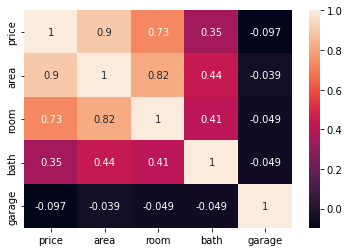

In [254]:
sns.heatmap(df.corr(), annot=True)

In [255]:
feat_num = ['price', 'area', 'room', 'bath', 'garage']

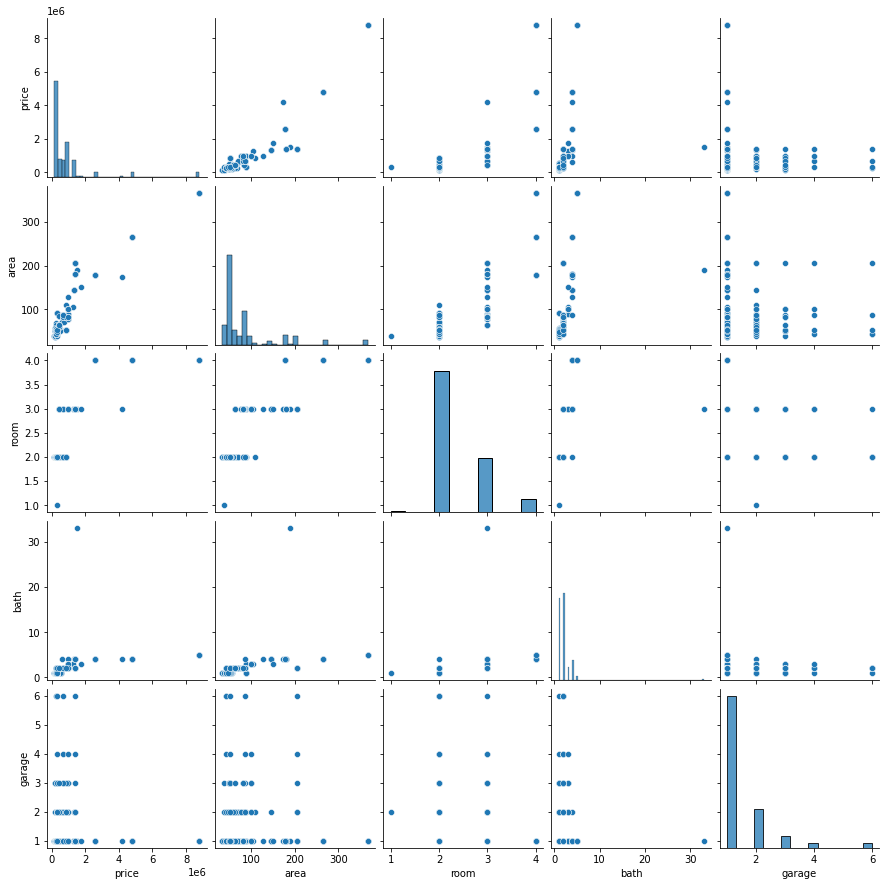

In [256]:
sns.pairplot(df[feat_num])

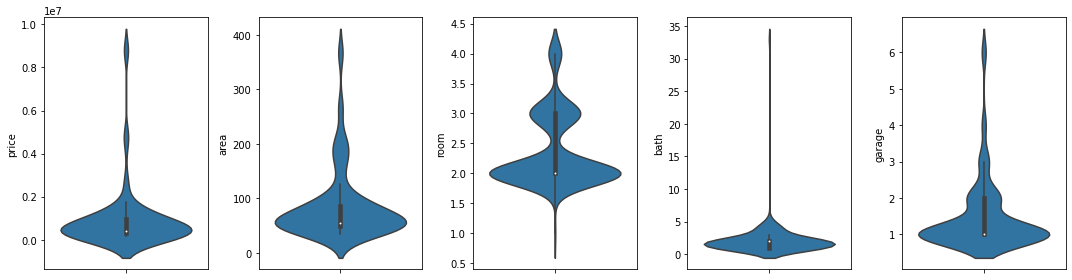

In [257]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(15,4)

for i in range(5):
  sns.violinplot(data= df, y = feat_num[i], ax=axes[i])

plt.tight_layout()

plt.show()

### Removendo espaços nulos

In [258]:
print('Quantidade de linhas nulas\n')
for col in df.columns:
  print(f'{col}: {df[col].isna().sum()}')

Quantidade de linhas nulas

property_describe: 0
price: 12
area: 0
room: 0
bath: 4
garage: 0
neighbourhood: 0


In [259]:
df.dropna(subset=['price', 'bath'], inplace=True)

### Remoção de Outliers

In [260]:
def z_score_remove(df, col):
  z = np.abs(stats.zscore(df[col]))
  return df[(z<2)]

In [261]:
df = z_score_remove(df, 'price')
df = z_score_remove(df, 'bath')

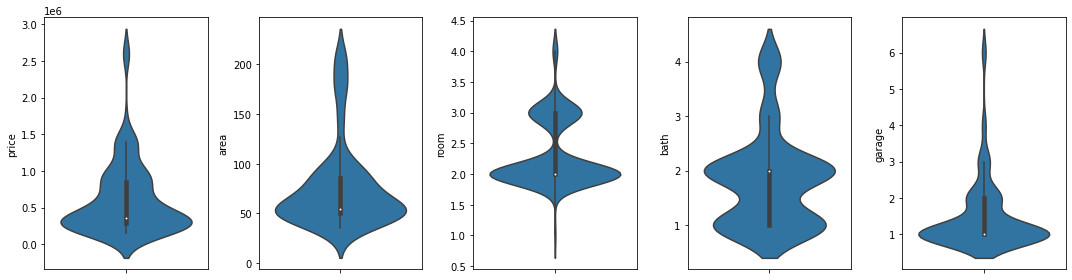

In [262]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(15,4)

for i in range(5):
  sns.violinplot(data= df, y = feat_num[i], ax=axes[i])

plt.tight_layout()

plt.show()

## Análise de variáveis categóricas

In [263]:
df['neighbourhood'].value_counts()

 São Paulo                         18
 Moema                             15
 Morumbi                           14
 Parque Munhoz                     10
 Vila Dionísia                     10
 Jardim Ampliação                   9
 Jardim Leonor Mendes de Barros     9
 Vila Monumento                     9
 Jardim das Acacias                 5
 Jardim Novo Taboão                 5
 Vila Pirajussara                   5
 Vila Maria Alta                    5
 Vila Água Funda                    5
 Penha                              5
 Vila Nova Conceição                5
 Fazenda Aricanduva                 5
 Higienópolis                       5
 Centro                             5
 Jabaquara                          5
 Freguesia do Ó                     4
 Jardim Santa Emília                4
 Tucuruvi                           4
 Jardim Iracema                     4
 Água Branca                        4
 Pinheiros                          4
 Vila Ema                           4
 Consolação 

In [264]:
df.head()

,property_describe,price,area,room,bath,garage,neighbourhood
0,Condomínio fechado com apartamentos de 2 dormi...,162990.0,40.0,2.0,1.0,1.0,Caixa D Agua
2,Condomínio fechado com apartamentos de 2 dormi...,163990.0,40.0,2.0,1.0,1.0,Piracangagua
3,Maravilhoso apartamento com varanda Gourmet sa...,949000.0,89.0,3.0,3.0,2.0,Vila Mascote
4,O apartamento está localizado no bairro Sacomã...,163000.0,35.0,2.0,1.0,1.0,Sacomã
5,"Andar alto! Vista de todas janelas! Bate sol, ...",570000.0,53.0,2.0,1.0,1.0,Consolação


## Transformação de dados

In [265]:
z_score = StandardScaler()
def std_z_scale(df,col):
  df[col] = z_score.fit_transform(df[[col]])

In [266]:
for col in feat_num:
  std_z_scale(df, col)

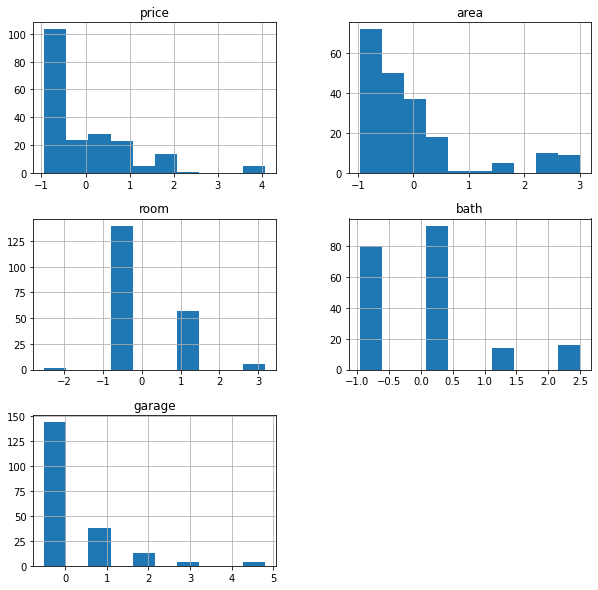

In [267]:
df[feat_num].hist(figsize=(10,10), bins=10)
plt.show()

In [268]:
df = df.reset_index()
df = df.drop(columns=['index', 'property_describe'])

### Exportando resultado

In [271]:
df.to_csv('train_test.csv', encoding='utf-8-sig')